<a href="https://colab.research.google.com/github/HemavathiRamamoorthy/Python/blob/main/CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CapstoneProject - Web Scrapping with EDA**

# Web Scrapping

Import Required libraries for the project

In [ ]:
import requests 
from bs4 import BeautifulSoup as bs
import bs4

In [ ]:
# Initialization of the lists to store the extracted data
# The data that we extract is unstructured data. So we’ll create empty lists to store them in a structured form,
count=0                  # Intialize search row count
products=[]              #List to store name of the product
brands=[]                #List to store brand name of the product
prices=[]                #List to store price of the product
ratings=[]               #List to store rating of the product
ram = []                 #List to store RAM specifications of the product
rom=[]                   #List to store ROM specifications of the product
display = []             #List to store Display specifications of the product
camera=[]                #List to store Camera specifications of the product
battery=[]               #List to store Battery specifications of the product
processor=[]             #List to store Processor specifications of the product

Get a website link for getting data . I have got Flipkart Mobile website Link for this project

In [ ]:
for i in range(1,11):
  link="https://www.flipkart.com/search?sid=tyy%2C4io&otracker=CLP_Filters&p%5B%5D=facets.price_range.from%3D16000&p%5B%5D=facets.price_range.to%3D20000&page="+str(i)
  page = requests.get(link)
  soup = bs(page.content,'html.parser')
  for containers in soup.findAll('a',class_='_1fQZEK'):
        name=containers.find('div', attrs={'class':'_4rR01T'})
        brandSplit=name.text.split(' ')
        brand=brandSplit[0].upper()
        price=containers.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
        rating=containers.find('div', attrs={'class':'_3LWZlK'})
        specification = containers.find('div', attrs={'class':'fMghEO'})

        ## Splitting integrated specification into individual CPU, RAM, OS, HDD and Display specifications
        for col in specification:
            col=col.find_all('li', attrs={'class':'rgWa7D'})
            ramFullText = col[0].text
            ramSplit=  ramFullText.split('|')
            ramt =ramSplit[0]
            romt=ramSplit[1]
            displayt = col[1].text
            camerat = col[2].text
            batteryt = col[3].text
            processort = col[4].text
          #  warrantyt = col[5].text
        
        products.append(name.text) # Add product name to list
        brands.append(brand)
        prices.append(price.text) # Add price to list       
        ram.append(ramt) # Add RAM specifications to list
        rom.append(romt)
        display.append(displayt) # Add Display specifications to list
        camera.append(camerat)
        battery.append(batteryt)
        processor.append(processort)
      #  warranty.append(warrantyt)
        ratings.append(rating.text) if type(rating) == bs4.element.Tag  else ratings.append('NaN') # Add Rating to list
        
        count=count+1 # Increment row count   

In [ ]:
count

240

In [ ]:
print(len(products))
print(len(ratings))
print(len(prices))
print(len(ram))
print(len(camera))
print(len(battery))
print(len(processor))


240
240
240
240
240
240
240


# Save Data as DataFrame

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame({'Product Name':products,'Brand':brands,'RAM':ram,'ROM':rom,'Camera':camera,'Battery':battery,'Processor':processor,'Display Size':display,'Price':prices,'Rating':ratings})

In [ ]:
df

,Product Name,Brand,RAM,ROM,Camera,Battery,Processor,Display Size,Price,Rating
0,"realme 9 Pro 5G (Midnight Black, 128 GB)",REALME,6 GB RAM,128 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Li-ion Battery,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,"₹17,999",4.5
1,"MOTOROLA G60 (Frosted Champagne, 128 GB)",MOTOROLA,6 GB RAM,128 GB ROM,108MP + 8MP + 2MP | 32MP Front Camera,6000 mAh Battery,Qualcomm Snapdragon 732G Processor,17.22 cm (6.78 inch) Full HD+ Display,"₹18,099",4.2
2,"POCO M4 Pro 5G (Cool Blue, 128 GB)",POCO,6 GB RAM,128 GB ROM,50MP + 8MP | 16MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,"₹16,999",4.4
3,"realme 9 Pro 5G (Aurora Green, 128 GB)",REALME,6 GB RAM,128 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Li-ion Battery,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,"₹17,999",4.5
4,"POCO M4 Pro 5G (Power Black, 128 GB)",POCO,6 GB RAM,128 GB ROM,50MP + 8MP | 16MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,"₹16,999",4.4
...,...,...,...,...,...,...,...,...,...,...
235,"vivo V20 SE (Gravity Black, 128 GB)",VIVO,8 GB RAM,128 GB ROM,48MP + 8MP + 2MP | 32MP Front Camera,4100 mAh Lithium-ion Battery,Qualcomm Snapdragon 665 Processor,16.36 cm (6.44 inch) Full HD+ Display,"₹18,750",4.3
236,"OPPO F5 (Black, 32 GB)",OPPO,4 GB RAM,32 GB ROM,16MP Rear Camera | 20MP Front Camera,3200 mAh Battery,Mediatek MT6763T Octa Core 2.5 GHz Processor,15.24 cm (6 inch) Full HD+ Display,"₹19,990",4.4
237,"realme 6 Pro (Lightning Orange, 128 GB)",REALME,8 GB RAM,128 GB ROM,64MP + 12MP + 8MP + 2MP | 16MP + 8MP Dual Fron...,4300 mAh Battery,Snapdragon 720G Processor,16.76 cm (6.6 inch) Full HD+ Display,"₹19,999",4.4
238,"SAMSUNG M31 Prime (Ocean Blue, 128 GB)",SAMSUNG,6 GB RAM,128 GB ROM,64MP Rear Camera,6000 mAh Battery,1 Year,16.26 cm (6.4 inch) Display,"₹17,194",4.3


Print DataFrame Dimension

In [ ]:
df.shape

(240, 10)

Print Dataframe details

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  240 non-null    object
 1   Brand         240 non-null    object
 2   RAM           240 non-null    object
 3   ROM           240 non-null    object
 4   Camera        240 non-null    object
 5   Battery       240 non-null    object
 6   Processor     240 non-null    object
 7   Display Size  240 non-null    object
 8   Price         240 non-null    object
 9   Rating        240 non-null    object
dtypes: object(10)
memory usage: 18.9+ KB


# Clean and Format Data

Check for Null values in any columns

In [ ]:
df.isnull().sum()

Product Name    0
Brand           0
RAM             0
ROM             0
Camera          0
Battery         0
Processor       0
Display Size    0
Price           0
Rating          0
dtype: int64

Removing rupee symbol (₹) from Price

In [ ]:
df['Price']=df['Price'].str.lstrip('₹')
df.head()

,Product Name,Brand,RAM,ROM,Camera,Battery,Processor,Display Size,Price,Rating
0,"realme 9 Pro 5G (Midnight Black, 128 GB)",REALME,6 GB RAM,128 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Li-ion Battery,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,"17,999",4.5
1,"MOTOROLA G60 (Frosted Champagne, 128 GB)",MOTOROLA,6 GB RAM,128 GB ROM,108MP + 8MP + 2MP | 32MP Front Camera,6000 mAh Battery,Qualcomm Snapdragon 732G Processor,17.22 cm (6.78 inch) Full HD+ Display,"18,099",4.2
2,"POCO M4 Pro 5G (Cool Blue, 128 GB)",POCO,6 GB RAM,128 GB ROM,50MP + 8MP | 16MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,"16,999",4.4
3,"realme 9 Pro 5G (Aurora Green, 128 GB)",REALME,6 GB RAM,128 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Li-ion Battery,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,"17,999",4.5
4,"POCO M4 Pro 5G (Power Black, 128 GB)",POCO,6 GB RAM,128 GB ROM,50MP + 8MP | 16MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,"16,999",4.4


Removing Comma (,) from Price field

In [ ]:
df['Price']=df['Price'].replace({',':''},regex=True)
df.head()

,Product Name,Brand,RAM,ROM,Camera,Battery,Processor,Display Size,Price,Rating
0,"realme 9 Pro 5G (Midnight Black, 128 GB)",REALME,6 GB RAM,128 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Li-ion Battery,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,17999,4.5
1,"MOTOROLA G60 (Frosted Champagne, 128 GB)",MOTOROLA,6 GB RAM,128 GB ROM,108MP + 8MP + 2MP | 32MP Front Camera,6000 mAh Battery,Qualcomm Snapdragon 732G Processor,17.22 cm (6.78 inch) Full HD+ Display,18099,4.2
2,"POCO M4 Pro 5G (Cool Blue, 128 GB)",POCO,6 GB RAM,128 GB ROM,50MP + 8MP | 16MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,16999,4.4
3,"realme 9 Pro 5G (Aurora Green, 128 GB)",REALME,6 GB RAM,128 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Li-ion Battery,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,17999,4.5
4,"POCO M4 Pro 5G (Power Black, 128 GB)",POCO,6 GB RAM,128 GB ROM,50MP + 8MP | 16MP Front Camera,5000 mAh Lithium-ion Polymer Battery,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,16999,4.4


Remove Battery string value and keep value only

In [ ]:
df['Battery']=df['Battery'].str.split(' mAh').str[0]

In [ ]:
df.head()

,Product Name,Brand,RAM,ROM,Camera,Battery,Processor,Display Size,Price,Rating
0,"realme 9 Pro 5G (Midnight Black, 128 GB)",REALME,6 GB RAM,128 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,5000,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,17999,4.5
1,"MOTOROLA G60 (Frosted Champagne, 128 GB)",MOTOROLA,6 GB RAM,128 GB ROM,108MP + 8MP + 2MP | 32MP Front Camera,6000,Qualcomm Snapdragon 732G Processor,17.22 cm (6.78 inch) Full HD+ Display,18099,4.2
2,"POCO M4 Pro 5G (Cool Blue, 128 GB)",POCO,6 GB RAM,128 GB ROM,50MP + 8MP | 16MP Front Camera,5000,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,16999,4.4
3,"realme 9 Pro 5G (Aurora Green, 128 GB)",REALME,6 GB RAM,128 GB ROM,64MP + 8MP + 2MP | 16MP Front Camera,5000,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,17999,4.5
4,"POCO M4 Pro 5G (Power Black, 128 GB)",POCO,6 GB RAM,128 GB ROM,50MP + 8MP | 16MP Front Camera,5000,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,16999,4.4


In [ ]:
df['RAM IN GB']=df['RAM'].str.split(' GB').str[0]
df['ROM IN GB']=df['ROM'].str.split(' GB').str[0]

In [ ]:
df.drop(['RAM'],axis=1, inplace = True)
df.drop(['ROM'],axis=1, inplace = True)

In [ ]:
df.head()

,Product Name,Brand,Camera,Battery,Processor,Display Size,Price,Rating,RAM IN GB,ROM IN GB
0,"realme 9 Pro 5G (Midnight Black, 128 GB)",REALME,64MP + 8MP + 2MP | 16MP Front Camera,5000,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,17999,4.5,6,128
1,"MOTOROLA G60 (Frosted Champagne, 128 GB)",MOTOROLA,108MP + 8MP + 2MP | 32MP Front Camera,6000,Qualcomm Snapdragon 732G Processor,17.22 cm (6.78 inch) Full HD+ Display,18099,4.2,6,128
2,"POCO M4 Pro 5G (Cool Blue, 128 GB)",POCO,50MP + 8MP | 16MP Front Camera,5000,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,16999,4.4,6,128
3,"realme 9 Pro 5G (Aurora Green, 128 GB)",REALME,64MP + 8MP + 2MP | 16MP Front Camera,5000,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,17999,4.5,6,128
4,"POCO M4 Pro 5G (Power Black, 128 GB)",POCO,50MP + 8MP | 16MP Front Camera,5000,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,16999,4.4,6,128


Check DataType of all column

In [ ]:
df.dtypes

Product Name    object
Brand           object
Camera          object
Battery         object
Processor       object
Display Size    object
Price           object
Rating          object
RAM IN GB       object
ROM IN GB       object
dtype: object

In [ ]:
#convert Price and ratings into float
#astype()
df['RAM IN GB']=df['RAM IN GB'].astype(int)
df['ROM IN GB']=df['ROM IN GB'].astype(int)
df['Battery']=df['Battery'].astype(int)
df['Price']=df['Price'].astype(float)
df['Rating']=df['Rating'].astype(float)

df.dtypes

Product Name     object
Brand            object
Camera           object
Battery           int64
Processor        object
Display Size     object
Price           float64
Rating          float64
RAM IN GB         int64
ROM IN GB         int64
dtype: object



# Store the scrapped data to CSV File

In [ ]:
df.to_csv('Flipkart_Mobile.csv',index=False)
df1=pd.read_csv('Flipkart_Mobile.csv')
df1

,Product Name,Brand,Camera,Battery,Processor,Display Size,Price,Rating,RAM IN GB,ROM IN GB
0,"realme 9 Pro 5G (Midnight Black, 128 GB)",REALME,64MP + 8MP + 2MP | 16MP Front Camera,5000,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,17999.0,4.5,6,128
1,"MOTOROLA G60 (Frosted Champagne, 128 GB)",MOTOROLA,108MP + 8MP + 2MP | 32MP Front Camera,6000,Qualcomm Snapdragon 732G Processor,17.22 cm (6.78 inch) Full HD+ Display,18099.0,4.2,6,128
2,"POCO M4 Pro 5G (Cool Blue, 128 GB)",POCO,50MP + 8MP | 16MP Front Camera,5000,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,16999.0,4.4,6,128
3,"realme 9 Pro 5G (Aurora Green, 128 GB)",REALME,64MP + 8MP + 2MP | 16MP Front Camera,5000,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,17999.0,4.5,6,128
4,"POCO M4 Pro 5G (Power Black, 128 GB)",POCO,50MP + 8MP | 16MP Front Camera,5000,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,16999.0,4.4,6,128
...,...,...,...,...,...,...,...,...,...,...
235,"vivo V20 SE (Gravity Black, 128 GB)",VIVO,48MP + 8MP + 2MP | 32MP Front Camera,4100,Qualcomm Snapdragon 665 Processor,16.36 cm (6.44 inch) Full HD+ Display,18750.0,4.3,8,128
236,"OPPO F5 (Black, 32 GB)",OPPO,16MP Rear Camera | 20MP Front Camera,3200,Mediatek MT6763T Octa Core 2.5 GHz Processor,15.24 cm (6 inch) Full HD+ Display,19990.0,4.4,4,32
237,"realme 6 Pro (Lightning Orange, 128 GB)",REALME,64MP + 12MP + 8MP + 2MP | 16MP + 8MP Dual Fron...,4300,Snapdragon 720G Processor,16.76 cm (6.6 inch) Full HD+ Display,19999.0,4.4,8,128
238,"SAMSUNG M31 Prime (Ocean Blue, 128 GB)",SAMSUNG,64MP Rear Camera,6000,1 Year,16.26 cm (6.4 inch) Display,17194.0,4.3,6,128


In [ ]:
df1.isnull().sum()

Product Name    0
Brand           0
Camera          0
Battery         0
Processor       0
Display Size    0
Price           0
Rating          4
RAM IN GB       0
ROM IN GB       0
dtype: int64

In [ ]:
df1 = df1.dropna()
df1

,Product Name,Brand,Camera,Battery,Processor,Display Size,Price,Rating,RAM IN GB,ROM IN GB
0,"realme 9 Pro 5G (Midnight Black, 128 GB)",REALME,64MP + 8MP + 2MP | 16MP Front Camera,5000,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,17999.0,4.5,6,128
1,"MOTOROLA G60 (Frosted Champagne, 128 GB)",MOTOROLA,108MP + 8MP + 2MP | 32MP Front Camera,6000,Qualcomm Snapdragon 732G Processor,17.22 cm (6.78 inch) Full HD+ Display,18099.0,4.2,6,128
2,"POCO M4 Pro 5G (Cool Blue, 128 GB)",POCO,50MP + 8MP | 16MP Front Camera,5000,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,16999.0,4.4,6,128
3,"realme 9 Pro 5G (Aurora Green, 128 GB)",REALME,64MP + 8MP + 2MP | 16MP Front Camera,5000,Qualcomm Snapdragon 695 Processor,16.76 cm (6.6 inch) Full HD+ Display,17999.0,4.5,6,128
4,"POCO M4 Pro 5G (Power Black, 128 GB)",POCO,50MP + 8MP | 16MP Front Camera,5000,Mediatek Dimensity 810 Processor,16.76 cm (6.6 inch) Full HD+ Display,16999.0,4.4,6,128
...,...,...,...,...,...,...,...,...,...,...
235,"vivo V20 SE (Gravity Black, 128 GB)",VIVO,48MP + 8MP + 2MP | 32MP Front Camera,4100,Qualcomm Snapdragon 665 Processor,16.36 cm (6.44 inch) Full HD+ Display,18750.0,4.3,8,128
236,"OPPO F5 (Black, 32 GB)",OPPO,16MP Rear Camera | 20MP Front Camera,3200,Mediatek MT6763T Octa Core 2.5 GHz Processor,15.24 cm (6 inch) Full HD+ Display,19990.0,4.4,4,32
237,"realme 6 Pro (Lightning Orange, 128 GB)",REALME,64MP + 12MP + 8MP + 2MP | 16MP + 8MP Dual Fron...,4300,Snapdragon 720G Processor,16.76 cm (6.6 inch) Full HD+ Display,19999.0,4.4,8,128
238,"SAMSUNG M31 Prime (Ocean Blue, 128 GB)",SAMSUNG,64MP Rear Camera,6000,1 Year,16.26 cm (6.4 inch) Display,17194.0,4.3,6,128


# EDA - Data Analysis and Visualization


#  Univariant analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Histogram**

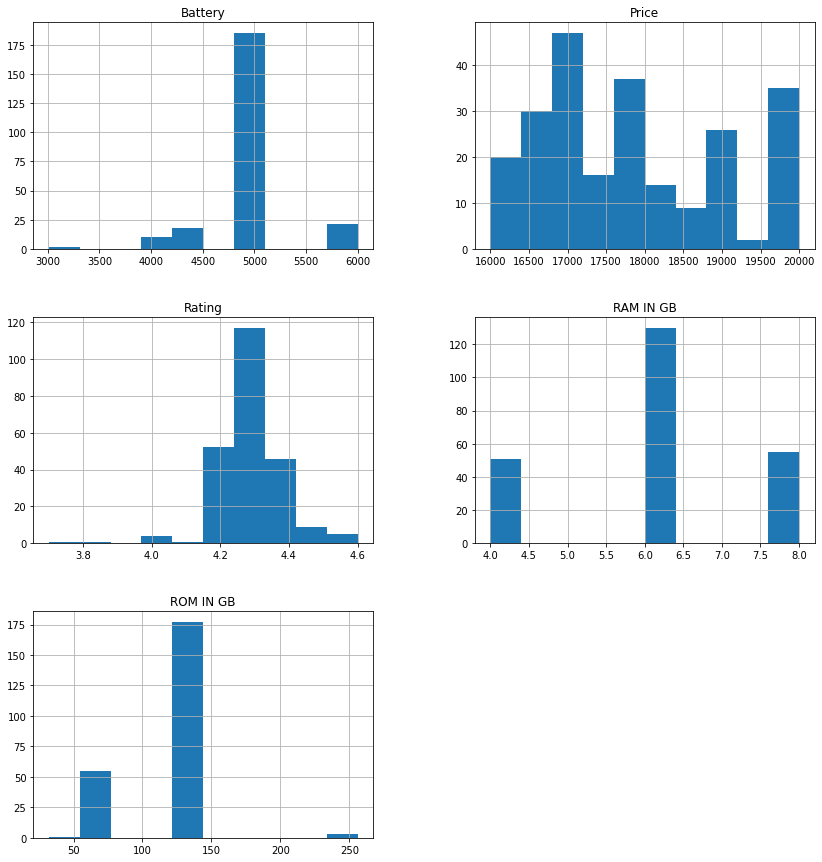

In [ ]:
df1.hist(figsize=(14,15))
plt.show()

#distplot is used for univariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


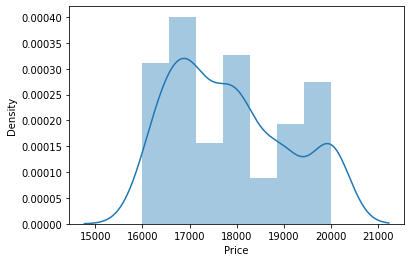

In [ ]:
sns.distplot(df1['Price'])
plt.show()

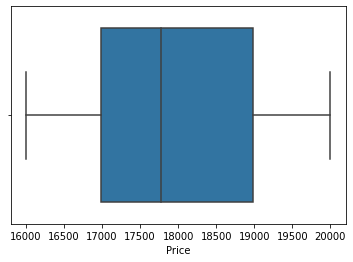

In [ ]:
sns.boxplot(x=df1['Price'])

# Bivariate Analysis

**Box Plot**

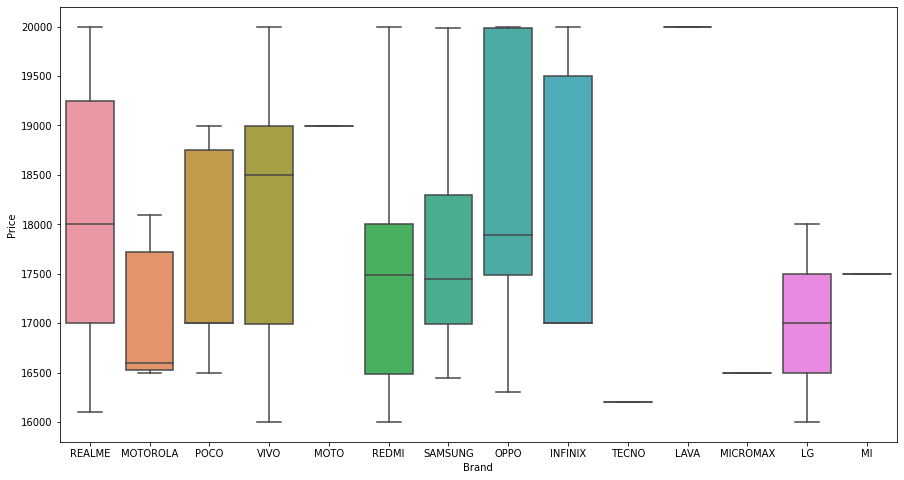

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(y="Price",x='Brand',data=df1)
plt.show()

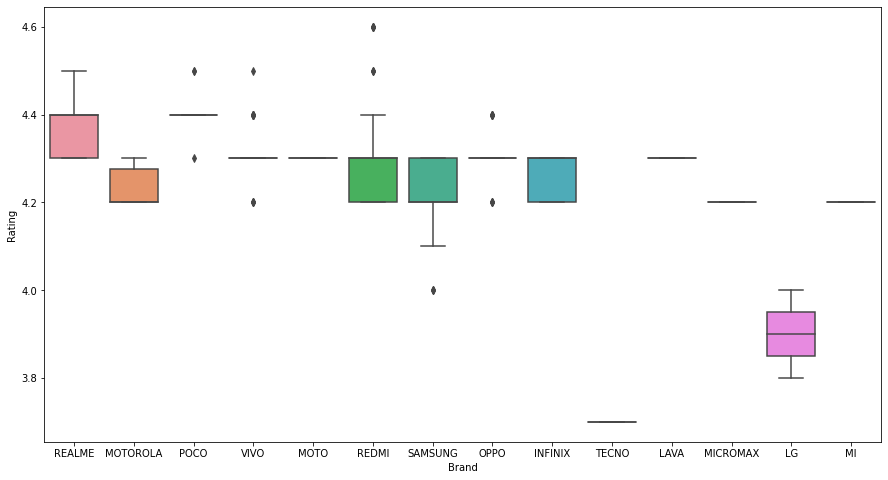

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(y="Rating",x='Brand',data=df1)
plt.show()

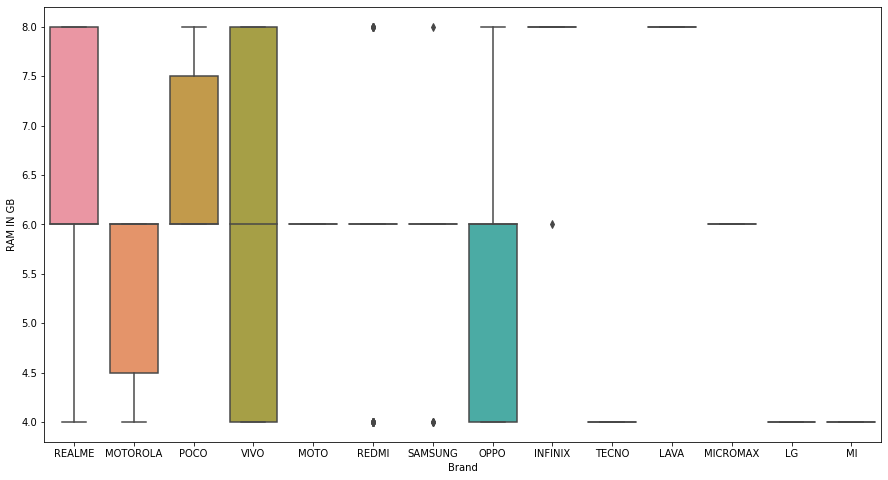

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(y="RAM IN GB",x='Brand',data=df1)
plt.show()

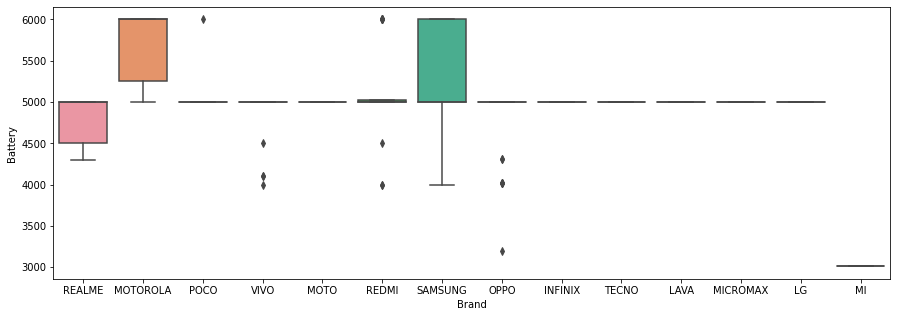

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y="Battery",x='Brand',data=df1)
plt.show()

**Bar Plot**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

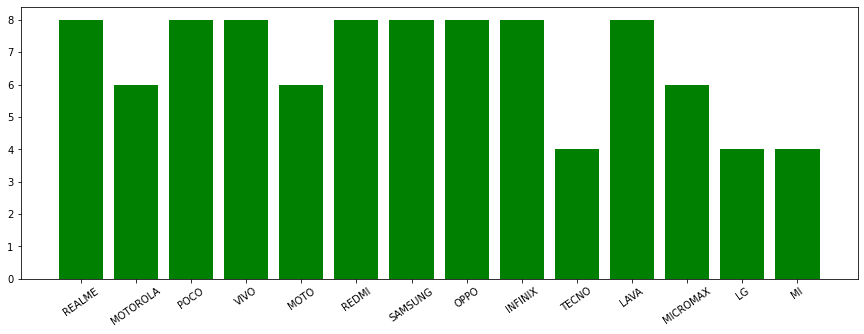

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(df1['Brand'],df1['RAM IN GB'],color='green')
plt.xticks(rotation=35)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

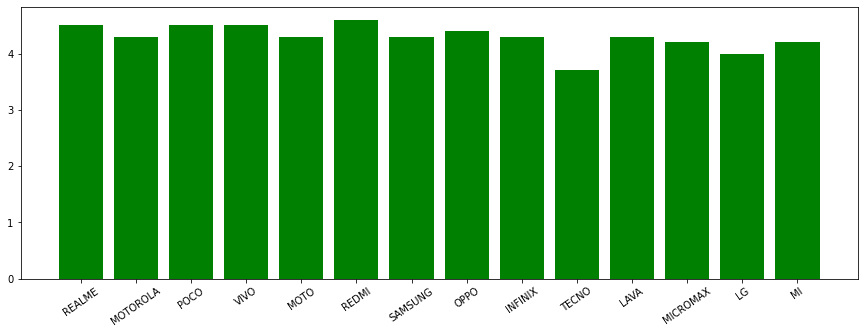

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(df1['Brand'],df1['Rating'],color='green')
plt.xticks(rotation=35)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

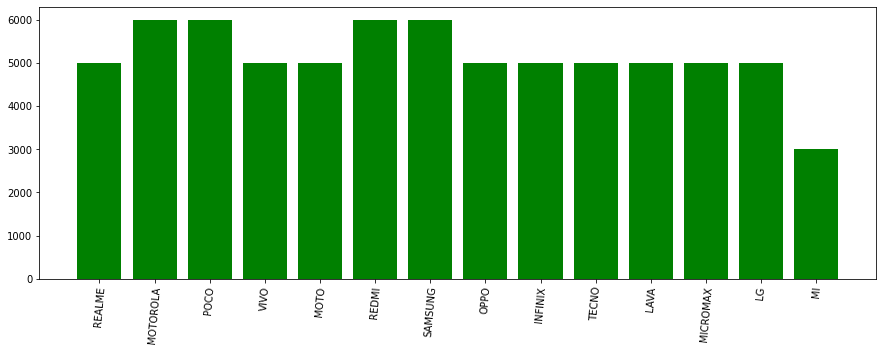

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(df1['Brand'],df1['Battery'],color='green')
plt.xticks(rotation=85)

**EDA**

In [ ]:
df1.describe()

,Battery,Price,Rating,RAM IN GB,ROM IN GB
count,236.000000,236.000000,236.000000,236.000000,236.000000
mean,4990.957627,17856.970339,4.300847,6.033898,114.305085
std,430.621676,1223.462382,0.109152,1.342796,31.916516
min,3010.000000,16000.000000,3.700000,4.000000,32.000000
25%,5000.000000,16990.000000,4.275000,6.000000,128.000000
50%,5000.000000,17780.000000,4.300000,6.000000,128.000000
75%,5000.000000,18990.000000,4.400000,6.000000,128.000000
max,6000.000000,19999.000000,4.600000,8.000000,256.000000


In [ ]:
df1["Brand"].value_counts()

REDMI       73
REALME      40
VIVO        37
OPPO        29
SAMSUNG     25
POCO        10
INFINIX      7
MOTOROLA     6
MOTO         2
LAVA         2
LG           2
TECNO        1
MICROMAX     1
MI           1
Name: Brand, dtype: int64

In [ ]:
df1.groupby(['Brand','Rating']).count() 

Product Name  Camera  Battery  Processor  Display Size  \
Brand    Rating                                                           
INFINIX  4.2                3       3        3          3             3   
         4.3                4       4        4          4             4   
LAVA     4.3                2       2        2          2             2   
LG       3.8                1       1        1          1             1   
         4.0                1       1        1          1             1   
MI       4.2                1       1        1          1             1   
MICROMAX 4.2                1       1        1          1             1   
MOTO     4.3                2       2        2          2             2   
MOTOROLA 4.2                4       4        4          4             4   
         4.3                2       2        2          2             2   
OPPO     4.2                4       4        4          4             4   
         4.3               19      19       19         19            19   
         4.4                6       6        6          6             6   
POCO     4.3                1       1        1          1             1   
         4.4                7       7        7          7             7   
         4.5                2       2        2          2             2   
REALME   4.3               18      18       18         18            18   
         4.4               19      19       19         19            19   
         4.5                3       3        3          3             3   
REDMI    4.2               23      23       23         23            23   
         4.3               35      35       35         35            35   
         4.4                7       7        7          7             7   
         4.5                3       3        3          3             3   
         4.6                5       5        5          5             5   
SAMSUNG  4.0                3       3        3          3             3   
         4.1                1       1        1          1             1   
         4.2               12      12       12         12            12   
         4.3                9       9        9          9             9   
TECNO    3.7                1       1        1          1             1   
VIVO     4.2                4       4        4          4             4   
         4.3               25      25       25         25            25   
         4.4                7       7        7          7             7   
         4.5                1       1        1          1             1   

                 Price  RAM IN GB  ROM IN GB  
Brand    Rating                               
INFINIX  4.2         3          3          3  
         4.3         4          4          4  
LAVA     4.3         2          2          2  
LG       3.8         1          1          1  
         4.0         1          1          1  
MI       4.2         1          1          1  
MICROMAX 4.2         1          1          1  
MOTO     4.3         2          2          2  
MOTOROLA 4.2         4          4          4  
         4.3         2          2          2  
OPPO     4.2         4          4          4  
         4.3        19         19         19  
         4.4         6          6          6  
POCO     4.3         1          1          1  
         4.4         7          7          7  
         4.5         2          2          2  
REALME   4.3        18         18         18  
         4.4        19         19         19  
         4.5         3          3          3  
REDMI    4.2        23         23         23  
         4.3        35         35         35  
         4.4         7          7          7  
         4.5         3          3          3  
         4.6         5          5          5  
SAMSUNG  4.0         3          3          3  
         4.1         1          1          1  
         4.2        12         12         12  
         4.3         9      

In [ ]:
df1.groupby(['Brand','Battery']).count() 

Product Name  Camera  Processor  Display Size  Price  \
Brand    Battery                                                         
INFINIX  5000                7       7          7             7      7   
LAVA     5000                2       2          2             2      2   
LG       5000                2       2          2             2      2   
MI       3010                1       1          1             1      1   
MICROMAX 5000                1       1          1             1      1   
MOTO     5000                2       2          2             2      2   
MOTOROLA 5000                2       2          2             2      2   
         6000                4       4          4             4      4   
OPPO     3200                1       1          1             1      1   
         4015                4       4          4             4      4   
         4310                2       2          2             2      2   
         5000               22      22         22            22     22   
POCO     5000                9       9          9             9      9   
         6000                1       1          1             1      1   
REALME   4300                2       2          2             2      2   
         4310                2       2          2             2      2   
         4500                9       9          9             9      9   
         5000               27      27         27            27     27   
REDMI    4000                2       2          2             2      2   
         4500                1       1          1             1      1   
         5000               36      36         36            36     36   
         5018                1       1          1             1      1   
         5020               27      27         27            27     27   
         6000                6       6          6             6      6   
SAMSUNG  4000                1       1          1             1      1   
         4500                1       1          1             1      1   
         4998                1       1          1             1      1   
         5000               12      12         12            12     12   
         6000               10      10         10            10     10   
TECNO    5000                1       1          1             1      1   
VIVO     4000                1       1          1             1      1   
         4100                2       2          2             2      2   
         4500                1       1          1             1      1   
         5000               33      33         33            33     33   

                  Rating  RAM IN GB  ROM IN GB  
Brand    Battery                                
INFINIX  5000          7          7          7  
LAVA     5000          2          2          2  
LG       5000          2          2          2  
MI       3010          1          1          1  
MICROMAX 5000          1          1          1  
MOTO     5000          2          2          2  
MOTOROLA 5000          2          2          2  
         6000          4          4          4  
OPPO     3200          1          1          1  
         4015          4          4          4  
         4310          2          2          2  
         5000         22         22         22  
POCO     5000          9          9          9  
         6000          1          1          1  
REALME   4300          2          2          2  
         4310          2          2          2  
         4500          9          9          9  
         5000         27         27         27  
REDMI    4000          2          2          2  
         4500          1          1          1  
         5000         36         36         36  
         5018          1          1          1  
         5020         27         27         27  
         6000          6          6          6  
SAMSUNG  4000          1          1          1  
         4500          1      

In [ ]:
df1.groupby(['Brand','Rating'])['Battery'].count() 

Brand     Rating
INFINIX   4.2        3
          4.3        4
LAVA      4.3        2
LG        3.8        1
          4.0        1
MI        4.2        1
MICROMAX  4.2        1
MOTO      4.3        2
MOTOROLA  4.2        4
          4.3        2
OPPO      4.2        4
          4.3       19
          4.4        6
POCO      4.3        1
          4.4        7
          4.5        2
REALME    4.3       18
          4.4       19
          4.5        3
REDMI     4.2       23
          4.3       35
          4.4        7
          4.5        3
          4.6        5
SAMSUNG   4.0        3
          4.1        1
          4.2       12
          4.3        9
TECNO     3.7        1
VIVO      4.2        4
          4.3       25
          4.4        7
          4.5        1
Name: Battery, dtype: int64

In [ ]:
df1.corr()

,Battery,Price,Rating,RAM IN GB,ROM IN GB
Battery,1.000000,-0.423201,-0.168082,-0.157291,0.021705
Price,-0.423201,1.000000,0.130840,0.462365,0.235651
Rating,-0.168082,0.130840,1.000000,0.081095,-0.047468
RAM IN GB,-0.157291,0.462365,0.081095,1.000000,0.512890
ROM IN GB,0.021705,0.235651,-0.047468,0.512890,1.000000


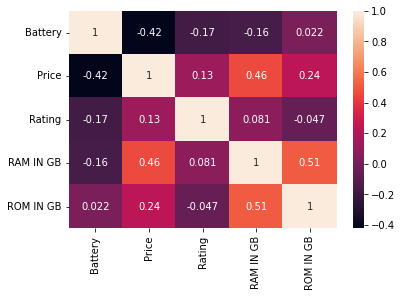

In [ ]:
sns.heatmap(df1.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


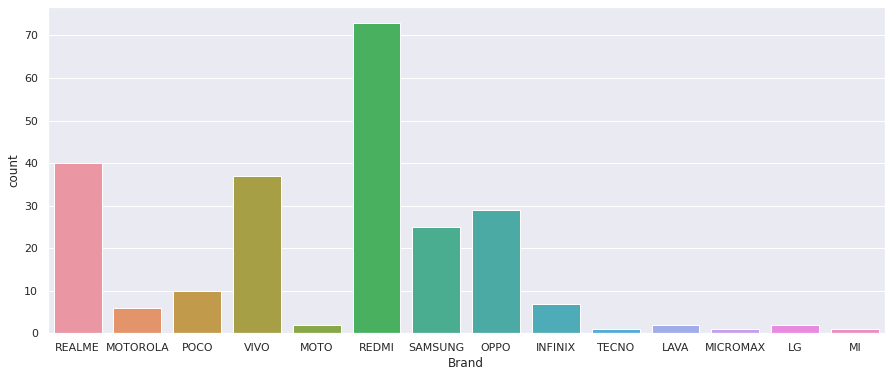

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot('Brand',data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


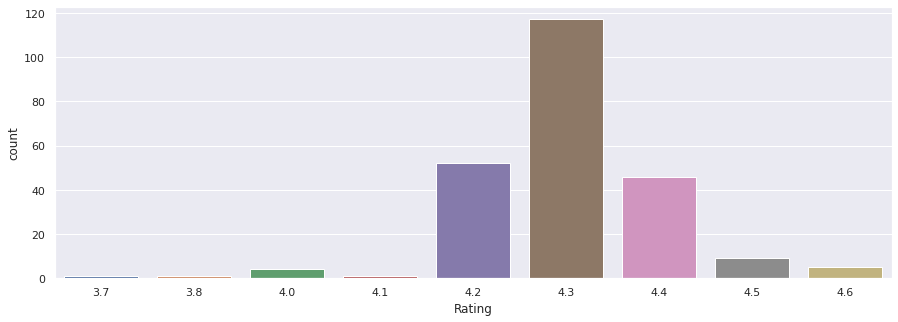

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot('Rating',data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


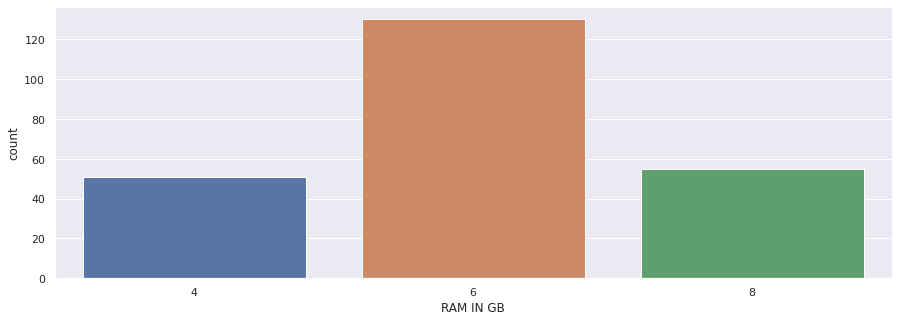

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot('RAM IN GB',data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


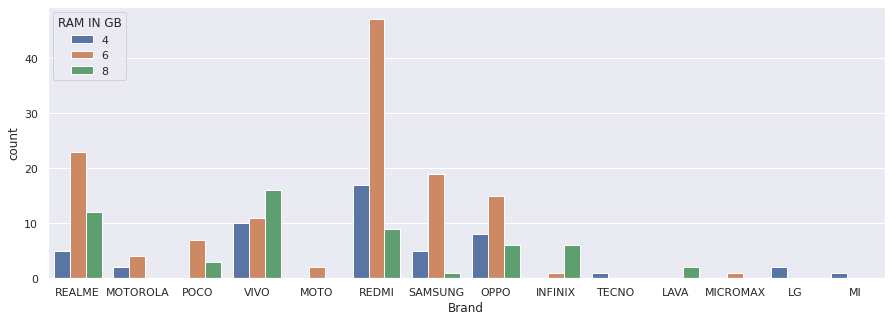

In [ ]:
sns.countplot('Brand',data=df1,hue='RAM IN GB')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


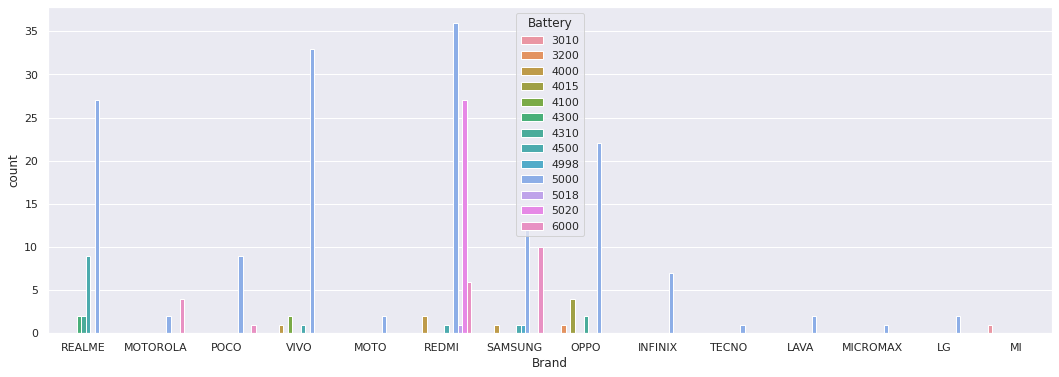

In [ ]:
sns.set(rc={'figure.figsize':(18,6)})
sns.countplot('Brand',data=df1,hue='Battery')

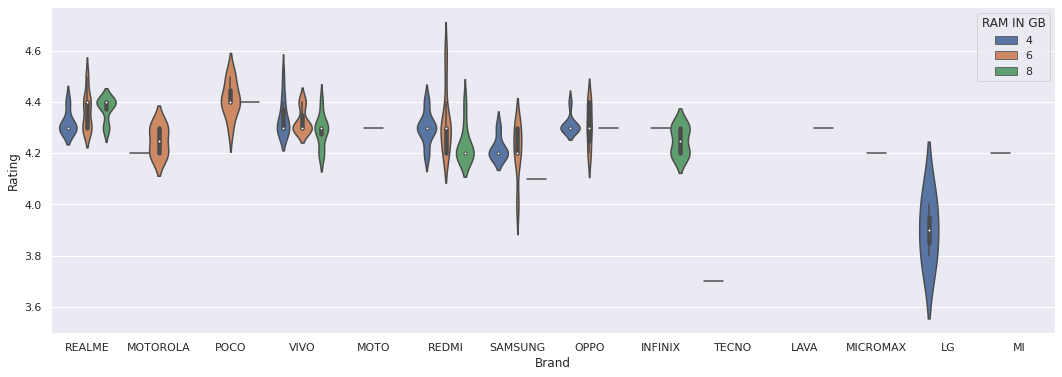

In [ ]:
sns.violinplot(x='Brand',y='Rating', hue='RAM IN GB',data=df1)